In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dataset:  brain_categorical.csv

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to
to the Size of the Head", Biometrika, Vol. 4, pp105-123

Description: Brain weight (grams) and head size (cubic cm) for 237
adults classified by gender and age group.

Variables/Columns
GENDER: Gender  Male or Female
AGE: Age Range  20-46 or 46+
SIZE: Head size (cm^3)  21-24
WEIGHT: Brain weight (grams)  29-32



In [2]:
# Read the csv file into a pandas DataFrame

brain = pd.read_csv('Resources/brain_categorical.csv')
brain.head()

,gender,age,size,weight
0,Male,20-46,4512,1530
1,Male,20-46,3738,1297
2,Male,20-46,4261,1335
3,Male,20-46,3777,1282
4,Male,20-46,4177,1590


In [3]:
X = brain[["gender", "age", "size"]]
y = brain["weight"].values.reshape(-1, 1)
print(X.shape, y.shape)

(237, 3) (237, 1)


In [4]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,size,gender_Female,gender_Male,age_20-46,age_46+
125,3782,0,1,0,1
119,3937,0,1,0,1
66,3415,0,1,0,1
216,3246,1,0,0,1
67,3372,0,1,0,1


### MinMaxScaler

In [5]:
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)
y_minmax = MinMaxScaler().fit(y_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)
y_train_minmax = y_minmax.transform(y_train)
y_test_minmax = y_minmax.transform(y_test)

In [6]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Min Max Scaled Data")

maxx = X_train["size"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-1, 1)
axes2.set_ylim(-1, 1)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["size"], y_train)
axes2.scatter(X_train_minmax[:,0], y_train_minmax[:])

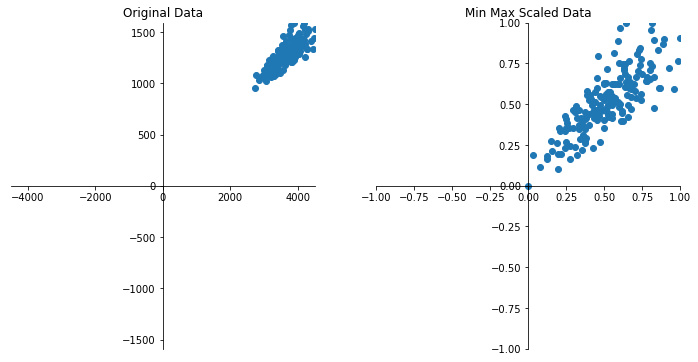

In [7]:
plt.show()